In [1]:
import os 
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import layers, models, datasets, optimizers

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [4]:
x_train = np.expand_dims(x_train, axis=-1)   # -> (60000, 28, 28, 1)
x_test  = np.expand_dims(x_test,  axis=-1)

In [5]:
from tensorflow.keras.applications import VGG16

## preprocessing the data

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
x_test.shape

(10000, 28, 28, 1)

In [8]:
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1, 
    horizontal_flip=True
)

In [9]:
train_data_gen

In [10]:
test_data_gen = ImageDataGenerator(
    rescale=1./255
)

In [11]:
X_train_resized = tf.image.resize(x_train, [32, 32])
X_test_resized = tf.image.resize(x_test, [32, 32])

#VGG16 accepts rgb. Tyasaile, grayscale to rgb
X_train_rgb = tf.image.grayscale_to_rgb(X_train_resized)
X_test_rgb = tf.image.grayscale_to_rgb(X_test_resized)

x_train = X_train_rgb
x_test = X_test_rgb

In [12]:
from sklearn.preprocessing import LabelEncoder
y_train = LabelEncoder().fit_transform(y_train)

In [13]:
y_test = LabelEncoder().fit_transform(y_test)

In [14]:
train_data = train_data_gen.flow(x_train, y_train)

In [15]:
test_data = test_data_gen.flow(x_test, y_test)

## Model building with VGG16

In [16]:
def build_modelVGG16():
    base_model = VGG16(weights = 'imagenet',include_top=False, input_shape = (32, 32, 3))
    base_model.trainable = False
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation = 'relu')(x)
    x = layers.Dropout(0.5)(x)
    predictions = layers.Dense(10, activation='softmax')(x)
    model = models.Model(inputs = base_model.input, outputs = predictions)
    return model

In [17]:
model = build_modelVGG16()
model.compile(optimizer = optimizers.Adam(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )

In [18]:
history = model.fit(x_train, y_train, epochs = 5, validation_data=(x_test, y_test), verbose = True)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 102s 54ms/step - accuracy: 0.8391 - loss: 0.6953 - val_accuracy: 0.9288 - val_loss: 0.2191
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 101s 54ms/step - accuracy: 0.9016 - loss: 0.3115 - val_accuracy: 0.9416 - val_loss: 0.1757
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 101s 54ms/step - accuracy: 0.9118 - loss: 0.2807 - val_accuracy: 0.9427 - val_loss: 0.1798
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 105s 56ms/step - accuracy: 0.9166 - loss: 0.2601 - val_accuracy: 0.9478 - val_loss: 0.1624
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 101s 54ms/step - accuracy: 0.9209 - loss: 0.2480 - val_accuracy: 0.9525 - val_loss: 0.1564


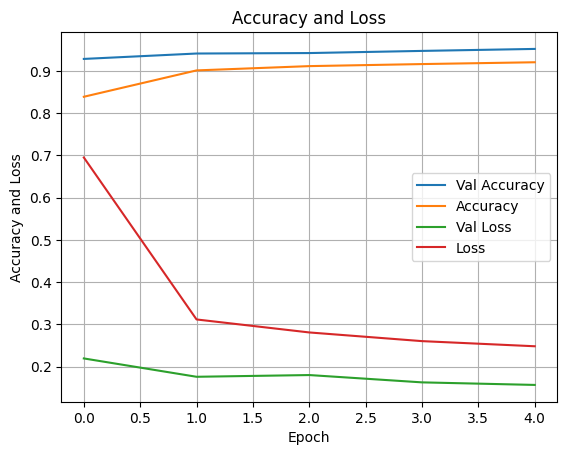

In [25]:
plt.plot(history.history['val_accuracy'], label = "Val Accuracy")
plt.plot(history.history['accuracy'], label = "Accuracy")
plt.plot(history.history['val_loss'], label = "Val Loss")
plt.plot(history.history['loss'], label = "Loss")
plt.title("Accuracy and Loss")
plt.xlabel('Epoch')
plt.ylabel('Accuracy and Loss')
plt.grid()
plt.legend()
plt.show()